In [1]:
#Example script (you will have to modify according to you data)

In [2]:
#Modules (probably don't need all of these, def need xarray)
from cmcrameri import cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glob as glob
import math as math
import pandas as pd

In [7]:
#filepath for your data
VOD_filepath = '/Users/student/Documents/VOD_Project/'

In [8]:
#import data
annual_VOD = xr.open_dataset(VOD_filepath + 'VOD_Toolik.nc')

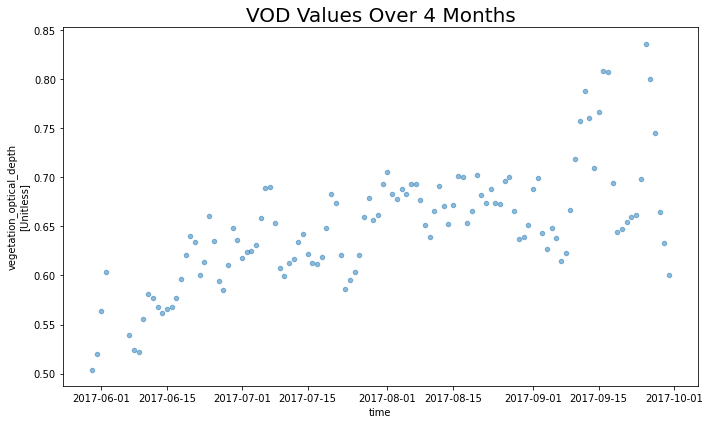

In [10]:

#function to aggregate across time/dates:
def get_vod(value, time1,time2):
    new_array = value
    new_array = new_array['VOD']
    vod_time = new_array.loc[time1:time2] #example: "2019-01-01":"2019-01-31"
    vod_time = vod_time.groupby('time.year').mean('time')
    vod_time = vod_time.drop('year', dim=None)
    vod_time = vod_time.squeeze("year")
    return vod_time

#Used this command with the scripting langauge NCO to extract a specific LAT and LON (Toolik Field Station) and
#then plot with time and VOD values from that point in Toolik.
#command: ncks -v time,VOD -d lon,147.8459 -d lat,64.8593 /Users/student/Documents/VOD_Project/MTDCA_36km_V4_nc/MTDCA_201704_201803_36km_V4.nc VOD_Toolik.nc

fig, ax = plt.subplots(figsize=(10,6))
#plot
s = [20*0**0]
annual_VOD.plot.scatter("time", "VOD", s=s, vmin=0, vmax=10, alpha=0.5,cmap=cm.batlow_r)
plt.title('VOD Values Over 4 Months',fontsize=20)
plt.tight_layout()

plt.savefig('/Users/student/Documents/VOD_Project/VOD_GRAPH_SCATTER.png',
            dpi=300,
           facecolor='white')



